In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
data = pd.read_csv(r"D:\Nihal Kumar\Study_Notes\Part_1_GL\Practice\Projects\svm\cancer.csv")
dataset = pd.DataFrame(data)
dataset.columns

Index(['id', 'clump_thickness', 'unif_cell_size', 'unif_cell_shape',
       'marg_adhesion', 'single_epith_cell_size', 'bare_nuclei', 'bland_chrom',
       'norm_nucleoli', 'mitoses', 'classes'],
      dtype='object')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      699 non-null    int64 
 1   clump_thickness         699 non-null    int64 
 2   unif_cell_size          699 non-null    int64 
 3   unif_cell_shape         699 non-null    int64 
 4   marg_adhesion           699 non-null    int64 
 5   single_epith_cell_size  699 non-null    int64 
 6   bare_nuclei             699 non-null    object
 7   bland_chrom             699 non-null    int64 
 8   norm_nucleoli           699 non-null    int64 
 9   mitoses                 699 non-null    int64 
 10  classes                 699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [4]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
clump_thickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
unif_cell_size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
unif_cell_shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
marg_adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
single_epith_cell_size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
bland_chrom,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
norm_nucleoli,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
classes,699.0,3.447783e-01,0.475636,0.0,0.0,0.0,1.0,1.0


In [5]:
dataset = dataset.replace('?',np.nan)
dataset = dataset.apply(lambda x:x.fillna(x.median()),axis=0)
dataset['bare_nuclei'] = dataset['bare_nuclei'].astype('float64')

In [6]:
dataset.isnull().sum()

id                        0
clump_thickness           0
unif_cell_size            0
unif_cell_shape           0
marg_adhesion             0
single_epith_cell_size    0
bare_nuclei               0
bland_chrom               0
norm_nucleoli             0
mitoses                   0
classes                   0
dtype: int64

KeyError: 'Class'

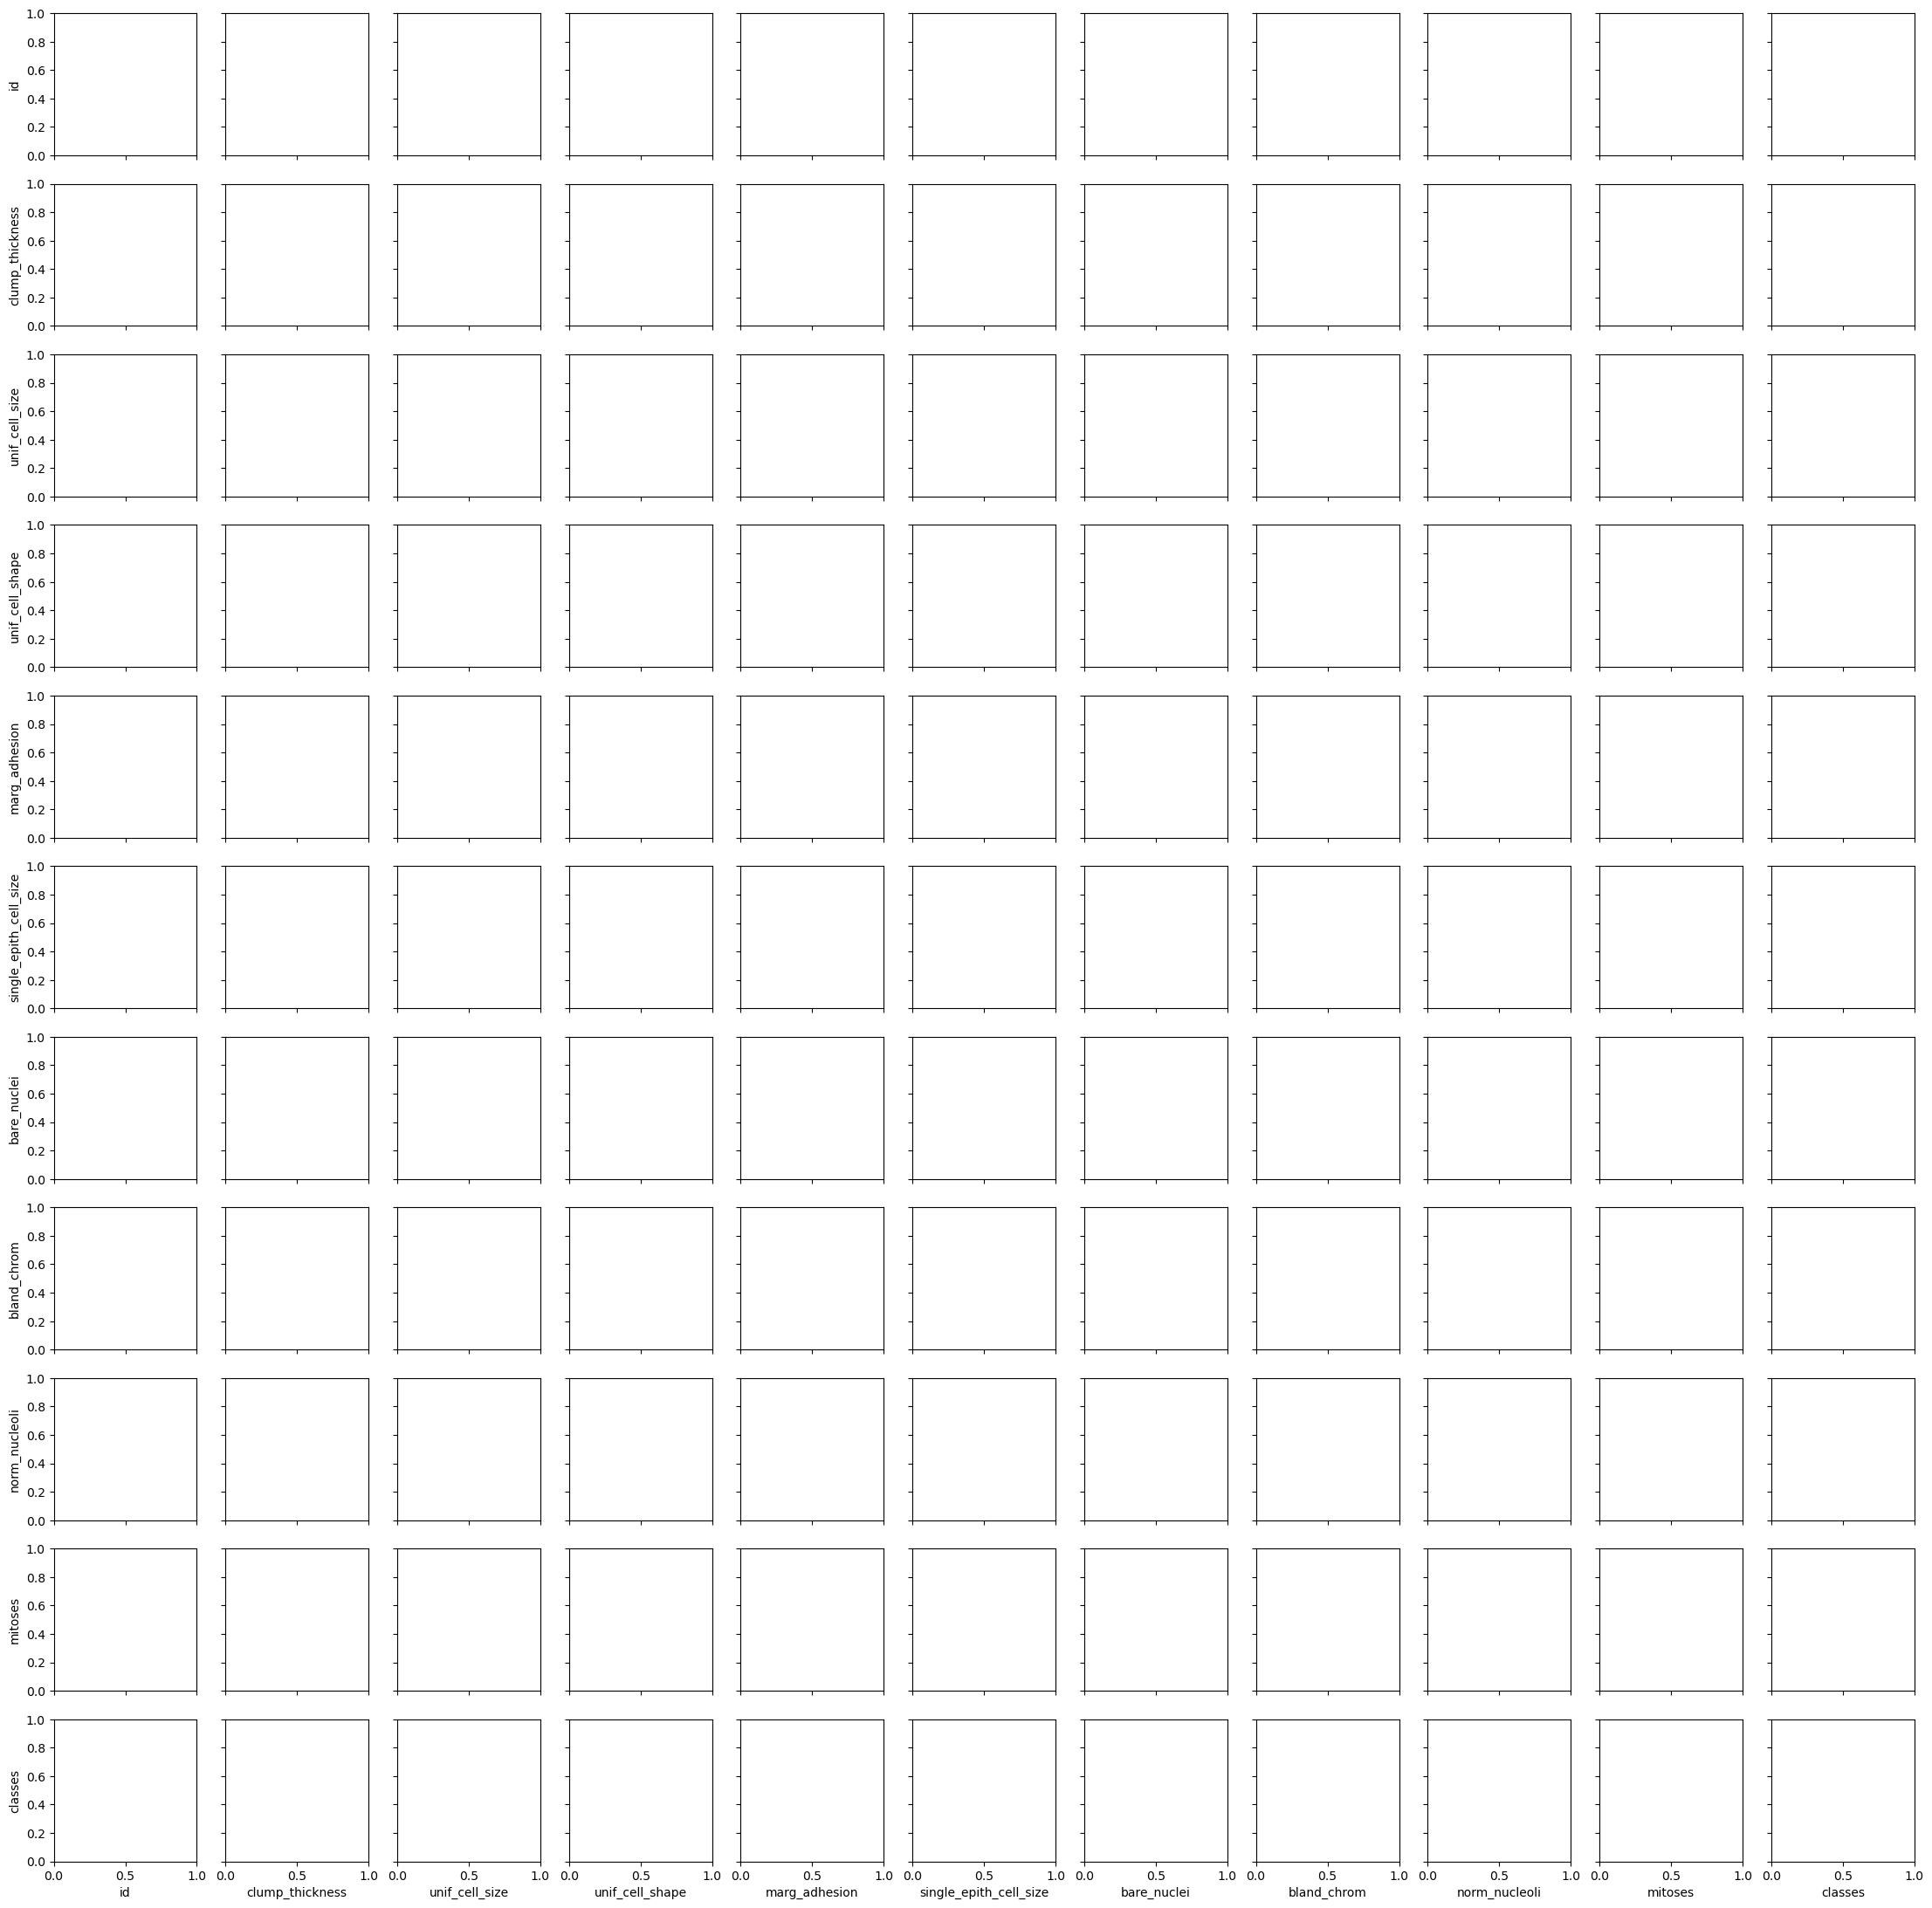

In [7]:
sns.pairplot(dataset, diag_kind = 'kde', hue="Class")

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
target = dataset['classes']
features = dataset.drop(["id","classes"], axis=1)
X_train,X_test,y_train,y_test =train_test_split(features, target,test_size=0.2,random_state=10)

In [9]:
from sklearn.svm import SVC
svc_model = SVC(C=.1,kernel='linear',gamma = 1)
svc_model.fit(X_train,y_train)
prediction =svc_model.predict(X_test)

In [10]:
print(svc_model.score(X_train,y_train))
print(svc_model.score(X_test,y_test))

0.9749552772808586
0.9642857142857143


In [11]:
print(confusion_matrix(prediction,y_test))

[[95  2]
 [ 3 40]]


In [12]:
svc_model =SVC(kernel ='rbf')
svc_model.fit(X_train,y_train)

SVC()

In [13]:
print(svc_model.score(X_train,y_train))
print(svc_model.score(X_test,y_test))

0.9785330948121646
0.9642857142857143


In [14]:
svc_model =SVC(kernel ='poly')
svc_model.fit(X_train,y_train)
prediction =svc_model.predict(X_test)
print(svc_model.score(X_train,y_train))
print(svc_model.score(X_test,y_test))

0.9785330948121646
0.9571428571428572


In [15]:
svc_model =SVC(kernel ='sigmoid')
svc_model.fit(X_train,y_train)
prediction =svc_model.predict(X_test)
print(svc_model.score(X_train,y_train))
print(svc_model.score(X_test,y_test))

0.3953488372093023
0.44285714285714284
